# 02-725 HW 6

## Anushka Sinha (anushka3)

### Imports

In [1]:
import pandas as pd 
import numpy as np
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

## 1 Subcellular localization

### 1. Design a Na ̈ıve Bayesian Classification method to classify the location of proteins based on their features. Assume each feature is either discrete or Gaussian. Decide on whether to use discrete or Gaussian model for each feature based on the values of the features and the description. Train your method on the first 2000 proteins to learn the parameters, and test it on the next 391 proteins. What is the accuracy of the method?


In [2]:
data = pd.read_csv("localization_features.txt", sep='\s+')
column_data_types = data.dtypes

In [3]:
gaussian_features = data.select_dtypes(include=['float64']).columns.tolist()

discrete_features = data.select_dtypes(include=['int64']).columns.tolist()

negative_valued_columns = []

for col in discrete_features:
    if (data[col] < 0).any():  
        negative_valued_columns.append(col)

additional_columns = ['mip', 'length', 'tms']
gaussian_features.extend(negative_valued_columns + additional_columns)
discrete_features = [col for col in discrete_features if col not in negative_valued_columns and col not in additional_columns]
print("Number of gaussian features", len(gaussian_features))
print("Number of discrete features", len(discrete_features))
print()
print("The gaussian features are", gaussian_features)
print()
print("The discrete features are", discrete_features)

Number of gaussian features 36
Number of discrete features 20

The gaussian features are ['Acont', 'Rcont', 'Ncont', 'Dcont', 'Ccont', 'Qcont', 'Econt', 'Gcont', 'Hcont', 'Icont', 'Lcont', 'Kcont', 'Mcont', 'Fcont', 'Pcont', 'Scont', 'Tcont', 'Wcont', 'Ycont', 'Vcont', 'alm', 'gvh', 'leu', 'maxHydropathy0_29_12', 'maxHydropathy5_29_11', 'mit', 'nuc', 'pox', 'psg', 'top', 'tyr', 'averageNegativeCharge0_24', 'maxNegativeCharge0_19_12', 'mip', 'length', 'tms']

The discrete features are ['act', 'bac', 'caa', 'dna', 'erl', 'erm', 'gpi', 'm1a', 'm1b', 'm2', 'm3a', 'm3b', 'mNt', 'm_', 'myr', 'px2', 'rib', 'rnp', 'vac', 'yqr']


In [4]:
shuffled_index = data.index.to_numpy()
np.random.shuffle(shuffled_index)
shuffled_data = data.reindex(shuffled_index).reset_index(drop=True)

# Split into features and target
X, y = shuffled_data.iloc[:, 2:], shuffled_data.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

gaus_model = GaussianNB()
gaus_model.fit(X_train[gaussian_features], y_train)

cat_model = CategoricalNB()
cat_model.fit(X_train[discrete_features], y_train)

gaus_probs = gaus_model.predict_proba(X_test[gaussian_features])
cat_probs = cat_model.predict_proba(X_test[discrete_features])

probs = (gaus_probs * cat_probs) / gaus_model.class_prior_
y_preds = gaus_model.classes_[np.argmax(probs, axis=1)]
y_true = y_test.to_list()

print("The accuracy score obtained is", accuracy_score(y_true, y_preds))

The accuracy score obtained is 0.6137787056367432


### 2. Design a kNN classification method for this problem, and try various values of k. What is the value of k with highest accuracy?

In [11]:
# Scale the features using StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Highest cross-validated accuracy: 0.7970732574193813 achieved at k = 1


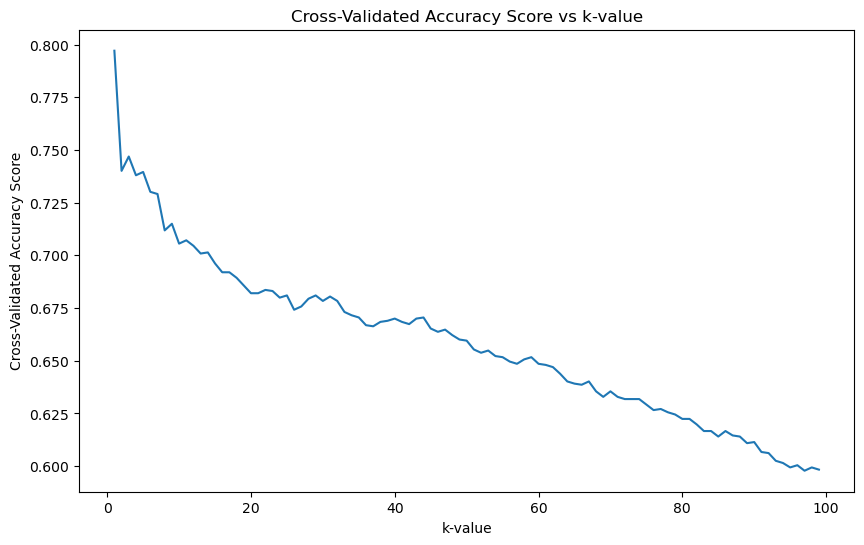

In [12]:
avg_cv_scores = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    avg_cv_scores.append(cv_scores.mean())

max_accuracy = max(avg_cv_scores)
best_k = avg_cv_scores.index(max_accuracy) + 1  

print("Highest cross-validated accuracy:", max_accuracy, "achieved at k =", best_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), avg_cv_scores)
plt.title('Cross-Validated Accuracy Score vs k-value')
plt.xlabel('k-value')
plt.ylabel('Cross-Validated Accuracy Score')
plt.show()


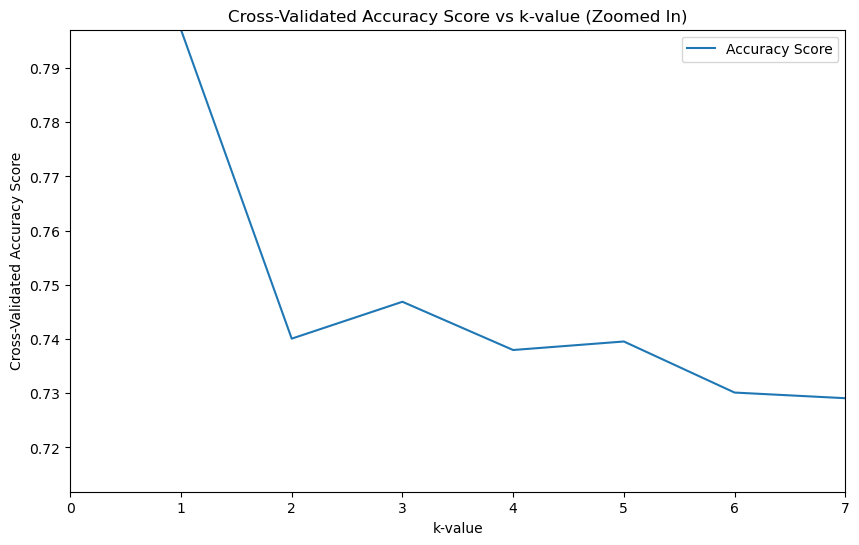

In [13]:
# Adjust the plot to zoom in on the range from k = 0 to k = 7
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), avg_cv_scores, label='Accuracy Score')
plt.title('Cross-Validated Accuracy Score vs k-value (Zoomed In)')
plt.xlabel('k-value')
plt.ylabel('Cross-Validated Accuracy Score')
plt.xlim(0, 7)  # Setting the x-axis limits to only show k-values from 0 to 7
plt.ylim(min(avg_cv_scores[:8]), max(avg_cv_scores[:8]))  # y-axis limits based on the scores within the range of k
plt.legend()
plt.show()


In [14]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7515657620041754
